In [3]:
import pandas as pd

daylio = pd.read_csv("Daylio_Abid.csv")
daylio.head()



,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


In [16]:
print("Dataset shape:", daylio.shape)
print("\nColumn types:")
print(daylio.dtypes)
print("\nColumn names:")
print(daylio.columns.tolist())
print("\nFirst few rows:")
print(daylio.head())
print("\nUnique moods:")
print(daylio['mood'].value_counts())

Dataset shape: (940, 7)

Column types:
full_date     object
date          object
weekday       object
time          object
sub_mood      object
activities    object
mood          object
dtype: object

Column names:
['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities', 'mood']

First few rows:
    full_date    date    weekday     time   sub_mood  \
0  16/04/2021  Apr-16     Friday  8:00 pm       yolo   
1  15/04/2021  Apr-15   Thursday  2:37 am   focused    
2  14/04/2021  Apr-14  Wednesday  2:39 am  confused    
3  13/04/2021  Apr-13    Tuesday  2:38 am  wondering   
4  12/04/2021  Apr-12     Monday  9:52 pm      angry   

                                          activities    mood  
0  reading | Art | prayer | fasting  | walk | med...    Good  
1  reading | learning  | Art | prayer | fasting  ...    Good  
2  reading | learning  | prayer | fasting  | Qura...  Normal  
3  reading | learning  | Art | prayer | fasting  ...  Normal  
4  reading | learning  | fasting  | walk 

In [17]:
# Cell 2: Data Processing
daylio['full_date'] = pd.to_datetime(daylio['full_date'], format='%d/%m/%Y')
daylio['month'] = daylio['full_date'].dt.month
daylio['day_of_week'] = daylio['full_date'].dt.day_name()
daylio['week_of_year'] = daylio['full_date'].dt.isocalendar().week

mood_mapping = {'Amazing': 5, 'Good': 4, 'Normal': 3, 'Bad': 2, 'Awful': 1}
daylio['mood_score'] = daylio['mood'].map(mood_mapping)

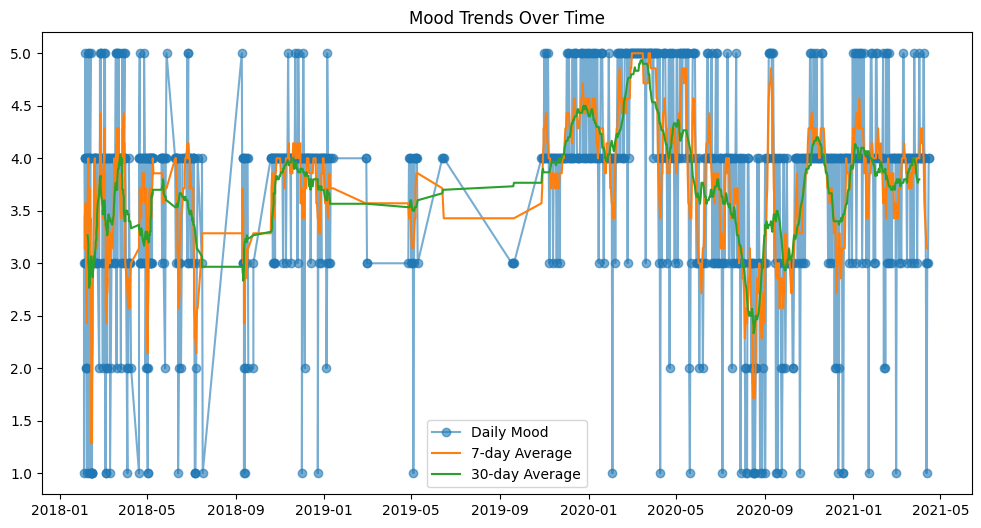

In [18]:
# Cell 3: Trend Analysis
daylio_sorted = daylio.sort_values('full_date')
daylio_sorted['mood_7day_avg'] = daylio_sorted['mood_score'].rolling(window=7, center=True).mean()
daylio_sorted['mood_30day_avg'] = daylio_sorted['mood_score'].rolling(window=30, center=True).mean()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(daylio_sorted['full_date'], daylio_sorted['mood_score'], 'o-', alpha=0.6, label='Daily Mood')
plt.plot(daylio_sorted['full_date'], daylio_sorted['mood_7day_avg'], '-', label='7-day Average')
plt.plot(daylio_sorted['full_date'], daylio_sorted['mood_30day_avg'], '-', label='30-day Average')
plt.title('Mood Trends Over Time')
plt.legend()
plt.show()

Weekly mood patterns:
                 mean       std  count
day_of_week                           
Friday       3.648855  1.022242    131
Monday       3.835821  0.990132    134
Saturday     3.763359  0.983182    131
Sunday       3.785185  0.875753    135
Thursday     3.824427  0.898554    131
Tuesday      3.625899  0.994721    139
Wednesday    3.517986  1.150630    139


<Figure size 1000x600 with 0 Axes>

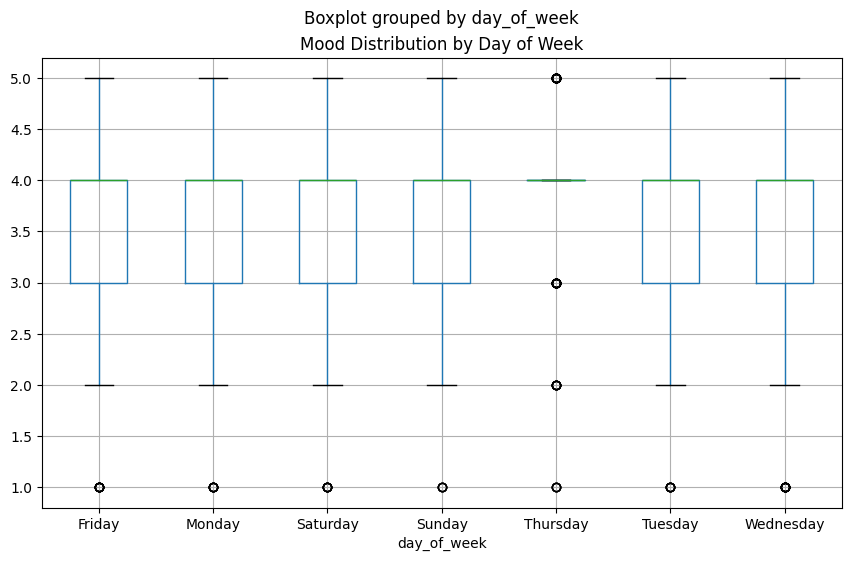

In [19]:
# Cell 4: Pattern Detection
weekly_patterns = daylio.groupby('day_of_week')['mood_score'].agg(['mean', 'std', 'count'])
print("Weekly mood patterns:")
print(weekly_patterns)

plt.figure(figsize=(10, 6))
daylio.boxplot(column='mood_score', by='day_of_week', figsize=(10, 6))
plt.title('Mood Distribution by Day of Week')
plt.show()

In [20]:
# Cell 5: Activity Analysis
activities_list = []
for activities in daylio['activities'].dropna():
    activities_list.extend([act.strip() for act in activities.split('|')])

from collections import Counter
activity_counts = Counter(activities_list)
top_activities = dict(activity_counts.most_common(10))

print("Top 10 activities:")
for activity, count in top_activities.items():
    print(f"{activity}: {count}")

Top 10 activities:
youtube: 770
streaming: 710
good meal: 586
Audio books: 553
reddit: 542
meditation: 541
Watching series: 539
walk: 521
News Update: 520
fasting: 485


In [21]:
# Cell 6: Anomaly Detection
from scipy import stats
import numpy as np

daylio_sorted['mood_zscore'] = np.abs(stats.zscore(daylio_sorted['mood_score']))
anomalies = daylio_sorted[daylio_sorted['mood_zscore'] > 2]

print(f"Found {len(anomalies)} mood anomalies:")
print(anomalies[['full_date', 'mood', 'mood_score', 'sub_mood']].head())

Found 51 mood anomalies:
     full_date   mood  mood_score    sub_mood
938 2018-02-03  Awful           1       angry
928 2018-02-07  Awful           1  triggered 
917 2018-02-10  Awful           1  triggered 
910 2018-02-12  Awful           1  triggered 
908 2018-02-13  Awful           1       angry


In [22]:
# Cell 7: Insights & Recommendations
def generate_insights(data):
    insights = []
    
    recent_avg = data['mood_score'].tail(14).mean()
    overall_avg = data['mood_score'].mean()
    
    if recent_avg < overall_avg - 0.5:
        insights.append("⚠️ Recent mood lower than average")
    
    low_mood_days = len(data[data['mood_score'] <= 2])
    if low_mood_days > len(data) * 0.15:
        insights.append("⚠️ High frequency of low mood days")
    
    mood_variance = data['mood_score'].var()
    if mood_variance > 1.5:
        insights.append("📊 High mood variability detected")
    
    return insights

insights = generate_insights(daylio_sorted)
for insight in insights:
    print(insight)

print(f"\nOverall Statistics:")
print(f"Average mood score: {daylio['mood_score'].mean():.2f}")
print(f"Mood variance: {daylio['mood_score'].var():.2f}")
print(f"Best day: {daylio_sorted.loc[daylio_sorted['mood_score'].idxmax(), 'full_date'].strftime('%Y-%m-%d')}")
print(f"Worst day: {daylio_sorted.loc[daylio_sorted['mood_score'].idxmin(), 'full_date'].strftime('%Y-%m-%d')}")


Overall Statistics:
Average mood score: 3.71
Mood variance: 0.99
Best day: 2018-02-05
Worst day: 2018-02-03


In [24]:
# Cell 8: Complete Mood Tracking System with Care Recommendations
class MoodTracker:
   def __init__(self, data):
       self.data = data.copy()
       self.prepare_data()
   
   def prepare_data(self):
       self.data['full_date'] = pd.to_datetime(self.data['full_date'], format='%d/%m/%Y')
       mood_mapping = {'Amazing': 5, 'Good': 4, 'Normal': 3, 'Bad': 2, 'Awful': 1}
       self.data['mood_score'] = self.data['mood'].map(mood_mapping)
       self.data = self.data.sort_values('full_date')
   
   def analyze_patterns(self):
       patterns = {}
       
       weekly = self.data.groupby('weekday')['mood_score'].mean()
       patterns['best_day'] = weekly.idxmax()
       patterns['worst_day'] = weekly.idxmin()
       
       recent_30 = self.data.tail(30)
       overall_avg = self.data['mood_score'].mean()
       recent_avg = recent_30['mood_score'].mean()
       patterns['recent_trend'] = "improving" if recent_avg > overall_avg else "declining"
       
       activity_impact = {}
       for idx, row in self.data.iterrows():
           if pd.notna(row['activities']):
               activities = [act.strip() for act in row['activities'].split('|')]
               for activity in activities:
                   if activity not in activity_impact:
                       activity_impact[activity] = []
                   activity_impact[activity].append(row['mood_score'])
       
       patterns['positive_activities'] = sorted(
           [(act, np.mean(scores)) for act, scores in activity_impact.items() if len(scores) >= 3],
           key=lambda x: x[1], reverse=True
       )[:5]
       
       return patterns
   
   def detect_concerning_trends(self):
       concerns = []
       recent_14 = self.data.tail(14)
       recent_30 = self.data.tail(30)
       
       bad_days_2weeks = len(recent_14[recent_14['mood_score'] <= 2])
       if bad_days_2weeks >= 7:
           concerns.append("CRITICAL: 7+ bad mood days in past 2 weeks")
       elif bad_days_2weeks >= 4:
           concerns.append("WARNING: 4+ bad mood days in past 2 weeks")
       
       if recent_14['mood_score'].mean() < self.data['mood_score'].mean() - 0.7:
           concerns.append("CRITICAL: Significant mood decline detected")
       
       if recent_30['mood_score'].std() > 1.5:
           concerns.append("WARNING: High mood instability")
       
       consecutive_low = 0
       max_consecutive = 0
       for score in recent_30['mood_score']:
           if score <= 2:
               consecutive_low += 1
               max_consecutive = max(max_consecutive, consecutive_low)
           else:
               consecutive_low = 0
       
       if max_consecutive >= 5:
           concerns.append("CRITICAL: 5+ consecutive low mood days")
       
       return concerns
   
   def generate_recommendations(self, concerns, patterns):
       recommendations = []
       
       critical_concerns = [c for c in concerns if c.startswith("CRITICAL")]
       if critical_concerns:
           recommendations.append("URGENT: Contact a mental health professional immediately")
           recommendations.append("Crisis Support: National Suicide Prevention Lifeline: 988")
           recommendations.append("Emergency: If in immediate danger, call 911")
       
       if patterns['positive_activities']:
           top_activity = patterns['positive_activities'][0][0]
           recommendations.append(f"Increase '{top_activity}' activity (average mood boost: {patterns['positive_activities'][0][1]:.1f}/5)")
       
       if patterns['best_day'] and patterns['worst_day']:
           recommendations.append(f"Schedule important tasks on {patterns['best_day']}s, practice self-care on {patterns['worst_day']}s")
       
       if patterns['recent_trend'] == "declining":
           recommendations.append("Reach out to trusted friends or family members")
           recommendations.append("Consider professional counseling or therapy")
       
       warning_concerns = [c for c in concerns if c.startswith("WARNING")]
       if warning_concerns:
           recommendations.append("Maintain regular exercise and sleep schedule")
           recommendations.append("Practice stress management techniques")
           recommendations.append("Consider mood tracking apps or journaling")
       
       if not concerns:
           recommendations.append("Continue current wellness practices")
           recommendations.append("Maintain social connections and healthy activities")
       
       return recommendations
   
   def generate_report(self):
       patterns = self.analyze_patterns()
       concerns = self.detect_concerning_trends()
       recommendations = self.generate_recommendations(concerns, patterns)
       
       print("=" * 60)
       print("MOOD TRACKING ANALYSIS REPORT")
       print("=" * 60)
       
       print(f"Analysis Period: {self.data['full_date'].min().strftime('%Y-%m-%d')} to {self.data['full_date'].max().strftime('%Y-%m-%d')}")
       print(f"Total Entries: {len(self.data)}")
       print(f"Average Mood Score: {self.data['mood_score'].mean():.2f}/5")
       print()
       
       print("PATTERN ANALYSIS:")
       print(f"Best day of week: {patterns['best_day']}")
       print(f"Most challenging day: {patterns['worst_day']}")
       print(f"Recent trend: {patterns['recent_trend']}")
       print()
       
       if patterns['positive_activities']:
           print("TOP MOOD-BOOSTING ACTIVITIES:")
           for activity, score in patterns['positive_activities']:
               print(f"- {activity}: {score:.2f}/5")
       print()
       
       if concerns:
           print("CONCERNING TRENDS DETECTED:")
           for concern in concerns:
               print(f"- {concern}")
       else:
           print("No concerning trends detected")
       print()
       
       print("CARE RECOMMENDATIONS:")
       for rec in recommendations:
           print(f"- {rec}")
       print()
       
       print("=" * 60)
       
       return {
           'patterns': patterns,
           'concerns': concerns,
           'recommendations': recommendations
       }

tracker = MoodTracker(daylio)
report = tracker.generate_report()

MOOD TRACKING ANALYSIS REPORT
Analysis Period: 2018-02-03 to 2021-04-16
Total Entries: 940
Average Mood Score: 3.71/5

PATTERN ANALYSIS:
Best day of week: Monday
Most challenging day: Wednesday
Recent trend: improving

TOP MOOD-BOOSTING ACTIVITIES:
- hiking: 4.33/5
- keto: 4.26/5
- holotropic: 4.23/5
- phd: 4.14/5
- weight log: 4.02/5

No concerning trends detected

CARE RECOMMENDATIONS:
- Increase 'hiking' activity (average mood boost: 4.3/5)
- Schedule important tasks on Mondays, practice self-care on Wednesdays
- Continue current wellness practices
- Maintain social connections and healthy activities



MOOD TRACKING ANALYSIS REPORT
Analysis Period: 2018-02-03 to 2021-04-16
Total Entries: 940
Average Mood Score: 3.71/5

PATTERN ANALYSIS:
Best day of week: Monday
Most challenging day: Wednesday
Recent trend: improving

TOP MOOD-BOOSTING ACTIVITIES:
- hiking: 4.33/5
- keto: 4.26/5
- holotropic: 4.23/5
- phd: 4.14/5
- weight log: 4.02/5

No concerning trends detected

CARE RECOMMENDATIONS:
- Increase 'hiking' activity (average mood boost: 4.3/5)
- Schedule important tasks on Mondays, practice self-care on Wednesdays
- Continue current wellness practices
- Maintain social connections and healthy activities



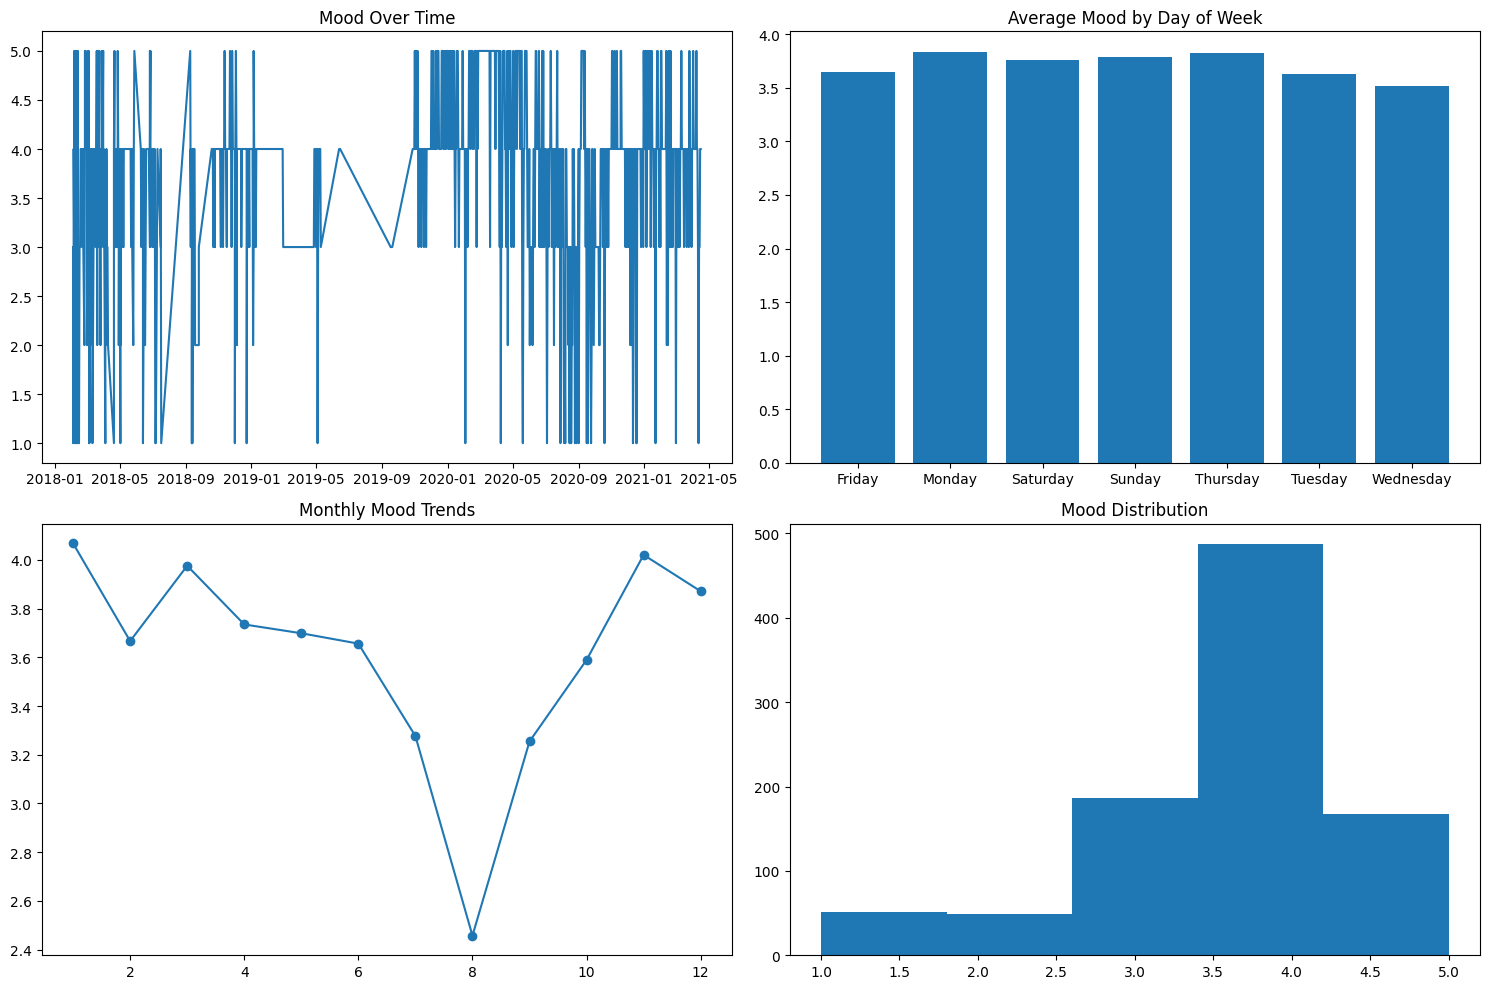

In [25]:
def complete_mood_analysis_system(data):
    # Initialize tracker
    tracker = MoodTracker(data)
    
    # Generate insights
    report = tracker.generate_report()
    
    # Show visualizations
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Mood over time
    plt.subplot(2, 2, 1)
    plt.plot(tracker.data['full_date'], tracker.data['mood_score'])
    plt.title('Mood Over Time')
    
    # Plot 2: Weekly patterns
    plt.subplot(2, 2, 2)
    weekly_avg = tracker.data.groupby('weekday')['mood_score'].mean()
    plt.bar(weekly_avg.index, weekly_avg.values)
    plt.title('Average Mood by Day of Week')
    
    # Plot 3: Monthly trends
    plt.subplot(2, 2, 3)
    monthly_avg = tracker.data.groupby(tracker.data['full_date'].dt.month)['mood_score'].mean()
    plt.plot(monthly_avg.index, monthly_avg.values, 'o-')
    plt.title('Monthly Mood Trends')
    
    # Plot 4: Mood distribution
    plt.subplot(2, 2, 4)
    plt.hist(tracker.data['mood_score'], bins=5)
    plt.title('Mood Distribution')
    
    plt.tight_layout()
    plt.show()
    
    return report

# Run the complete system
final_report = complete_mood_analysis_system(daylio)

In [26]:
# ===== CELL 9: Live Mood Input System =====
from datetime import datetime, timedelta
import os

class LiveMoodTracker:
    def __init__(self, existing_data):
        self.data = existing_data.copy()
        self.mood_mapping = {
            'awful': 1, 'bad': 2, 'meh': 3, 'good': 4, 'rad': 5
        }
    
    def add_mood_entry(self):
        """Interactive mood entry system"""
        print("\n=== ADD NEW MOOD ENTRY ===")
        
        # Get current date or custom date
        date_input = input("Enter date (YYYY-MM-DD) or press Enter for today: ").strip()
        if not date_input:
            entry_date = datetime.now().strftime('%Y-%m-%d')
        else:
            entry_date = date_input
        
        # Get mood
        print("\nMood Options:")
        print("1. awful (1) - Very bad day")
        print("2. bad (2) - Bad day") 
        print("3. meh (3) - Okay/neutral day")
        print("4. good (4) - Good day")
        print("5. rad (5) - Amazing day")
        
        mood_input = input("\nEnter mood (awful/bad/meh/good/rad): ").lower().strip()
        if mood_input not in self.mood_mapping:
            print("Invalid mood, defaulting to 'meh'")
            mood_input = 'meh'
        
        # Get activities
        activities = input("Enter activities (separated by |): ").strip()
        
        # Get notes
        notes = input("Any notes about today: ").strip()
        
        # Create new entry
        new_entry = {
            'full_date': pd.to_datetime(entry_date),
            'date': entry_date,
            'weekday': pd.to_datetime(entry_date).day_name(),
            'day_of_week': pd.to_datetime(entry_date).strftime('%A'),
            'mood': mood_input,
            'mood_score': self.mood_mapping[mood_input],
            'activities': activities if activities else 'none',
            'notes': notes if notes else 'none'
        }
        
        # Add to dataset
        self.data = pd.concat([self.data, pd.DataFrame([new_entry])], ignore_index=True)
        
        print(f"\n[SUCCESS] Mood entry added successfully!")
        print(f"Date: {entry_date}")
        print(f"Mood: {mood_input} (Score: {self.mood_mapping[mood_input]})")
        print(f"Activities: {activities}")
        
        return self.data
    
    def save_updated_data(self, filename="Updated_Daylio_Data.csv"):
        """Save the updated dataset"""
        self.data.to_csv(filename, index=False)
        print(f"\n[SAVED] Data saved to {filename}")
        return filename

# Initialize the live tracker
live_tracker = LiveMoodTracker(daylio)

In [27]:
updated_daylio = live_tracker.add_mood_entry()


=== ADD NEW MOOD ENTRY ===

Mood Options:
1. awful (1) - Very bad day
2. bad (2) - Bad day
3. meh (3) - Okay/neutral day
4. good (4) - Good day
5. rad (5) - Amazing day
Invalid mood, defaulting to 'meh'

[SUCCESS] Mood entry added successfully!
Date: 2020-02-01
Mood: meh (Score: 3)
Activities: awful



=== ADD NEW MOOD ENTRY ===

Mood Options:
1. awful (1) - Very bad day
2. bad (2) - Bad day
3. meh (3) - Okay/neutral day
4. good (4) - Good day
5. rad (5) - Amazing day

[SUCCESS] Mood entry added successfully!
Date: 2022-09-01
Mood: awful (Score: 1)
Activities: balling|swimming

[ANALYSIS] ANALYSIS OF LAST 7 DAYS
Average Mood Score: 2.71/5
Mood Trend: [DOWN] Declining

Daily Breakdown:
  2021-04-11: NORMAL (3/5) - reading | learning  | prayer | fasting  | walk | meditation  | shower | Audio books  | writing | good meal | reddit | language learning  | streaming  | youtube | cooking | cleaning | research  | new things  | power nap | Documentary  | penpal | coding  | Tutorial 
  2021-04-12: AWFUL (1/5) - reading | learning  | fasting  | walk | meditation  | shower | writing | Watching series  | good meal | reddit | language learning  | streaming  | youtube | cooking | cleaning | research  | new things  | power nap | Documentary  | penpal | coding  | Tutorial 
  2021-04-13: NORMAL (3/5) 

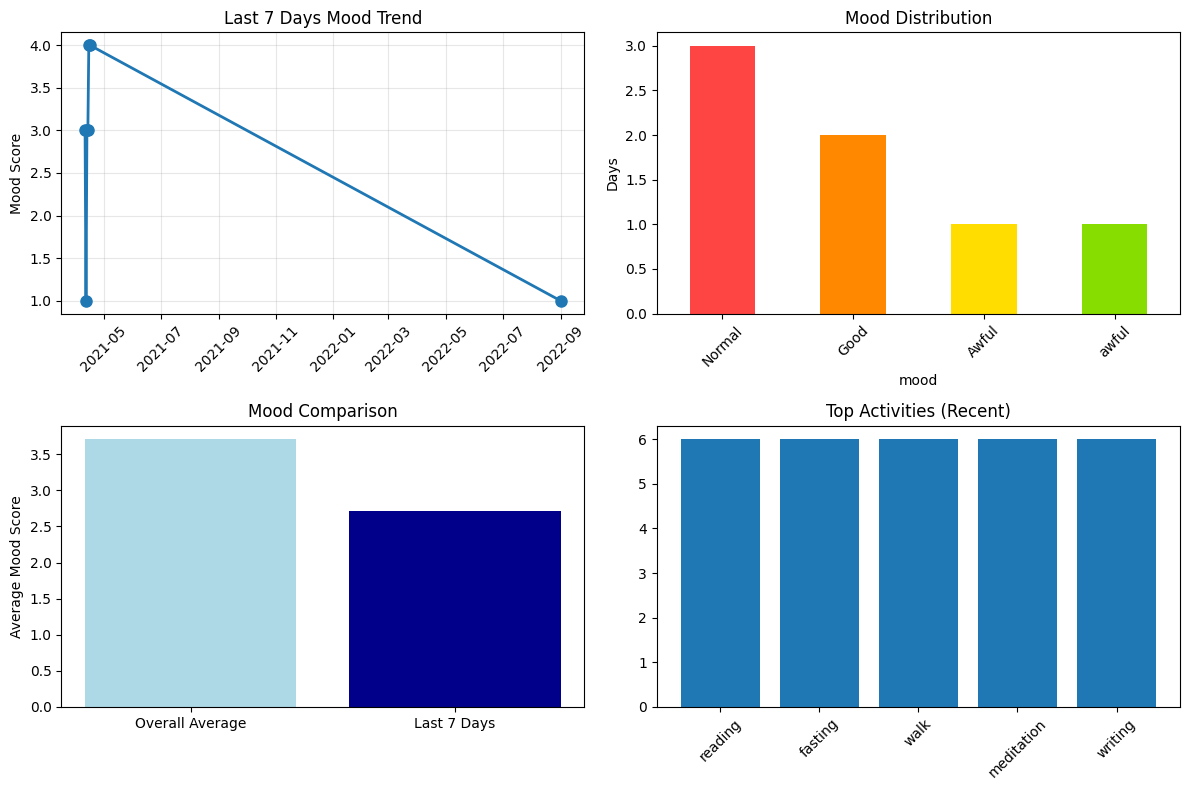

In [28]:
updated_daylio = live_tracker.add_mood_entry()

# ===== CELL 11: Weekly Analysis with New Data =====
def analyze_recent_week(data, days=7):
    """Analyze mood patterns for the last N days"""
    
    # Get recent data
    data_sorted = data.sort_values('full_date')
    recent_data = data_sorted.tail(days)
    
    print(f"\n[ANALYSIS] ANALYSIS OF LAST {days} DAYS")
    print("=" * 40)
    
    # Basic stats
    avg_mood = recent_data['mood_score'].mean()
    mood_trend = recent_data['mood_score'].diff().mean()
    
    print(f"Average Mood Score: {avg_mood:.2f}/5")
    print(f"Mood Trend: {'[UP] Improving' if mood_trend > 0 else '[DOWN] Declining' if mood_trend < 0 else '[STABLE] Stable'}")
    
    # Daily breakdown
    print(f"\nDaily Breakdown:")
    for _, row in recent_data.iterrows():
        date = row['full_date'].strftime('%Y-%m-%d')
        mood = row['mood']
        score = row['mood_score']
        activities = row['activities']
        print(f"  {date}: {mood.upper()} ({score}/5) - {activities}")
    
    # Mood distribution
    mood_counts = recent_data['mood'].value_counts()
    print(f"\nMood Distribution:")
    for mood, count in mood_counts.items():
        print(f"  {mood}: {count} days")
    
    # Create visualization
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Recent mood trend
    plt.subplot(2, 2, 1)
    plt.plot(recent_data['full_date'], recent_data['mood_score'], 'o-', linewidth=2, markersize=8)
    plt.title(f'Last {days} Days Mood Trend')
    plt.ylabel('Mood Score')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Mood distribution
    plt.subplot(2, 2, 2)
    mood_counts.plot(kind='bar', color=['#ff4444', '#ff8800', '#ffdd00', '#88dd00', '#00dd88'])
    plt.title('Mood Distribution')
    plt.ylabel('Days')
    plt.xticks(rotation=45)
    
    # Plot 3: Compare with overall average
    plt.subplot(2, 2, 3)
    overall_avg = data['mood_score'].mean()
    plt.bar(['Overall Average', f'Last {days} Days'], [overall_avg, avg_mood], 
            color=['lightblue', 'darkblue'])
    plt.title('Mood Comparison')
    plt.ylabel('Average Mood Score')
    
    # Plot 4: Activity analysis
    plt.subplot(2, 2, 4)
    activities_list = []
    for activities in recent_data['activities'].dropna():
        if activities != 'none':
            activities_list.extend([act.strip() for act in activities.split('|')])
    
    if activities_list:
        activity_counts = Counter(activities_list)
        top_activities = dict(activity_counts.most_common(5))
        plt.bar(top_activities.keys(), top_activities.values())
        plt.title('Top Activities (Recent)')
        plt.xticks(rotation=45)
    else:
        plt.text(0.5, 0.5, 'No activities recorded', ha='center', va='center')
        plt.title('Recent Activities')
    
    plt.tight_layout()
    plt.show()
    
    return recent_data

# Run analysis for last 7 days
recent_analysis = analyze_recent_week(updated_daylio, days=7)

In [29]:
class MentalHealthAnalyzer:
    def __init__(self, data):
        self.data = data.copy()
        self.data_sorted = self.data.sort_values('full_date')
    
    def detect_concerning_patterns(self):
        """Detect patterns that might indicate mental health concerns"""
        concerns = []
        
        # 1. Consecutive low mood days
        recent_moods = self.data_sorted.tail(14)['mood_score'].values
        consecutive_low = 0
        max_consecutive_low = 0
        
        for mood in recent_moods:
            if mood <= 2:  # awful or bad
                consecutive_low += 1
                max_consecutive_low = max(max_consecutive_low, consecutive_low)
            else:
                consecutive_low = 0
        
        if max_consecutive_low >= 3:
            concerns.append(f"[ALERT] {max_consecutive_low} consecutive days of low mood detected")
        
        # 2. Significant mood drops
        if len(recent_moods) >= 7:
            recent_avg = np.mean(recent_moods[-7:])
            previous_avg = np.mean(recent_moods[-14:-7]) if len(recent_moods) >= 14 else np.mean(recent_moods)
            
            if recent_avg < previous_avg - 1:
                concerns.append(f"[DECLINE] Significant mood drop detected (from {previous_avg:.1f} to {recent_avg:.1f})")
        
        # 3. Very low average mood
        recent_avg = np.mean(recent_moods)
        if recent_avg < 2.5:
            concerns.append(f"[WARNING] Low average mood over recent period ({recent_avg:.1f}/5)")
        
        # 4. High mood variability (potential instability)
        recent_std = np.std(recent_moods)
        if recent_std > 1.5:
            concerns.append(f"[VARIABILITY] High mood variability detected (std: {recent_std:.1f})")
        
        return concerns
    
    def generate_recommendations(self):
        """Generate personalized recommendations"""
        recommendations = []
        
        # Analyze recent data
        recent_data = self.data_sorted.tail(14)
        avg_mood = recent_data['mood_score'].mean()
        
        # Activity-based recommendations
        activities_list = []
        mood_by_activity = {}
        
        for _, row in recent_data.iterrows():
            if pd.notna(row['activities']) and row['activities'] != 'none':
                activities = [act.strip() for act in row['activities'].split('|')]
                for activity in activities:
                    if activity not in mood_by_activity:
                        mood_by_activity[activity] = []
                    mood_by_activity[activity].append(row['mood_score'])
        
        # Find mood-boosting activities
        positive_activities = []
        for activity, moods in mood_by_activity.items():
            if len(moods) >= 2 and np.mean(moods) >= 4:
                positive_activities.append((activity, np.mean(moods)))
        
        positive_activities.sort(key=lambda x: x[1], reverse=True)
        
        if positive_activities:
            recommendations.append(f"[BOOST] Consider doing more: {', '.join([act[0] for act in positive_activities[:3]])}")
        
        # Day-of-week recommendations
        day_moods = recent_data.groupby('day_of_week')['mood_score'].mean().sort_values()
        if len(day_moods) > 0:
            worst_day = day_moods.index[0]
            recommendations.append(f"[SCHEDULE] Plan self-care activities for {worst_day}s (lowest mood day)")
        
        # General recommendations based on mood level
        if avg_mood < 3:
            recommendations.extend([
                "[MINDFULNESS] Consider mindfulness or meditation practices",
                "[EXERCISE] Regular exercise can boost mood significantly",
                "[SOCIAL] Reach out to friends or family for support",
                "[TRACKING] Consider using mood tracking apps with reminders"
            ])
        
        return recommendations
    
    def generate_care_recommendations(self, concerns):
        """Generate care recommendations based on concerns"""
        care_recs = []
        
        if len(concerns) >= 2:
            care_recs.append("[PROFESSIONAL] Consider speaking with a mental health professional")
            care_recs.append("[CONTACT] Contact your doctor or therapist if you have one")
        
        if any("consecutive" in concern for concern in concerns):
            care_recs.append("[SUPPORT] Reach out to a trusted friend or family member")
            care_recs.append("[HELPLINE] Consider calling a mental health helpline if needed")
        
        # Always include general wellness tips
        care_recs.extend([
            "[WELLNESS] Ensure adequate hydration and nutrition",
            "[SLEEP] Maintain regular sleep schedule",
            "[SUNLIGHT] Try to get some sunlight each day",
            "[TRACKING] Continue mood tracking to identify patterns"
        ])
        
        return care_recs

# Initialize analyzer
analyzer = MentalHealthAnalyzer(updated_daylio)

# Generate insights
print("\n[INSIGHTS] MENTAL HEALTH INSIGHTS")
print("=" * 50)

concerns = analyzer.detect_concerning_patterns()
if concerns:
    print("\n[CONCERNS] AREAS OF CONCERN:")
    for concern in concerns:
        print(f"  {concern}")
else:
    print("\n[STATUS] No immediate concerning patterns detected")

recommendations = analyzer.generate_recommendations()
print(f"\n[RECOMMENDATIONS] PERSONALIZED RECOMMENDATIONS:")
for rec in recommendations:
    print(f"  {rec}")

care_recommendations = analyzer.generate_care_recommendations(concerns)
print(f"\n[CARE] CARE RECOMMENDATIONS:")
for care_rec in care_recommendations:
    print(f"  {care_rec}")


[INSIGHTS] MENTAL HEALTH INSIGHTS

[CONCERNS] AREAS OF CONCERN:
  [DECLINE] Significant mood drop detected (from 4.1 to 2.7)

[RECOMMENDATIONS] PERSONALIZED RECOMMENDATIONS:
  [BOOST] Consider doing more: trimming, Art, travel
  [SCHEDULE] Plan self-care activities for Mondays (lowest mood day)

[CARE] CARE RECOMMENDATIONS:
  [WELLNESS] Ensure adequate hydration and nutrition
  [SLEEP] Maintain regular sleep schedule
  [SUNLIGHT] Try to get some sunlight each day
  [TRACKING] Continue mood tracking to identify patterns



           COMPREHENSIVE MOOD TRACKING DASHBOARD

[OVERVIEW] OVERVIEW:
  Total Entries: 942
  Date Range: 2018-02-03 to 2022-09-01
  Average Mood: 3.71/5
  Most Recent Entry: 2022-09-01


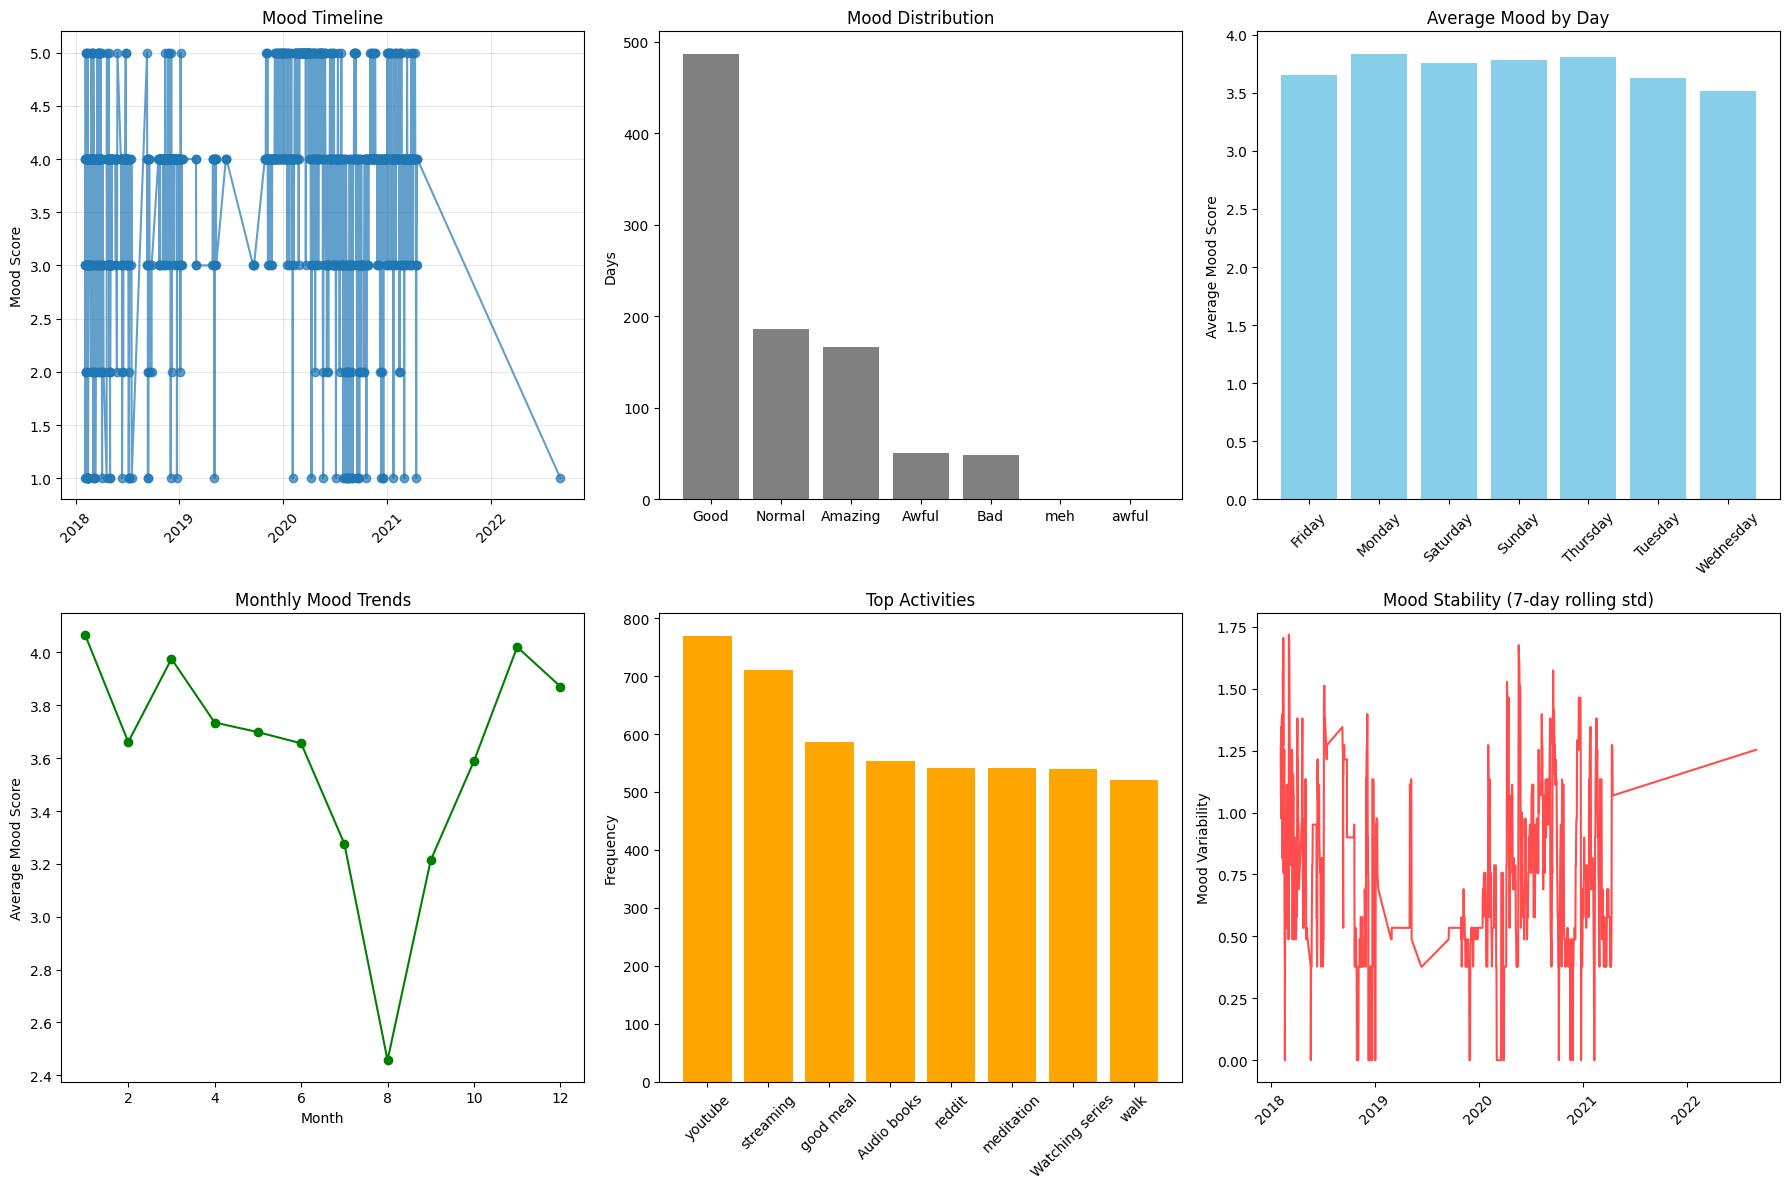


[SAVED] Data saved to Updated_Daylio_Data.csv

[COMPLETE] Complete analysis finished! Updated data saved as: Updated_Daylio_Data.csv


In [30]:
def create_comprehensive_dashboard(data):
    """Create a comprehensive mood tracking dashboard"""
    
    print("\n" + "="*60)
    print("           COMPREHENSIVE MOOD TRACKING DASHBOARD")
    print("="*60)
    
    # Basic statistics
    total_entries = len(data)
    date_range = (data['full_date'].min().strftime('%Y-%m-%d'), 
                  data['full_date'].max().strftime('%Y-%m-%d'))
    avg_mood = data['mood_score'].mean()
    
    print(f"\n[OVERVIEW] OVERVIEW:")
    print(f"  Total Entries: {total_entries}")
    print(f"  Date Range: {date_range[0]} to {date_range[1]}")
    print(f"  Average Mood: {avg_mood:.2f}/5")
    print(f"  Most Recent Entry: {data.sort_values('full_date').iloc[-1]['full_date'].strftime('%Y-%m-%d')}")
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Mood timeline
    data_sorted = data.sort_values('full_date')
    axes[0,0].plot(data_sorted['full_date'], data_sorted['mood_score'], 'o-', alpha=0.7)
    axes[0,0].set_title('Mood Timeline')
    axes[0,0].set_ylabel('Mood Score')
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Mood distribution
    mood_counts = data['mood'].value_counts()
    colors = ['#ff4444', '#ff8800', '#ffdd00', '#88dd00', '#00dd88']
    mood_colors = dict(zip(['awful', 'bad', 'meh', 'good', 'rad'], colors))
    bar_colors = [mood_colors.get(mood, 'gray') for mood in mood_counts.index]
    axes[0,1].bar(mood_counts.index, mood_counts.values, color=bar_colors)
    axes[0,1].set_title('Mood Distribution')
    axes[0,1].set_ylabel('Days')
    
    # 3. Weekly patterns
    weekly_avg = data.groupby('day_of_week')['mood_score'].mean()
    axes[0,2].bar(weekly_avg.index, weekly_avg.values, color='skyblue')
    axes[0,2].set_title('Average Mood by Day')
    axes[0,2].set_ylabel('Average Mood Score')
    axes[0,2].tick_params(axis='x', rotation=45)
    
    # 4. Monthly trends
    data['month'] = data['full_date'].dt.month
    monthly_avg = data.groupby('month')['mood_score'].mean()
    axes[1,0].plot(monthly_avg.index, monthly_avg.values, 'o-', color='green')
    axes[1,0].set_title('Monthly Mood Trends')
    axes[1,0].set_ylabel('Average Mood Score')
    axes[1,0].set_xlabel('Month')
    
    # 5. Activity analysis
    activities_list = []
    for activities in data['activities'].dropna():
        if activities != 'none':
            activities_list.extend([act.strip() for act in activities.split('|')])
    
    if activities_list:
        activity_counts = Counter(activities_list)
        top_activities = dict(activity_counts.most_common(8))
        axes[1,1].bar(range(len(top_activities)), list(top_activities.values()), color='orange')
        axes[1,1].set_title('Top Activities')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].set_xticks(range(len(top_activities)))
        axes[1,1].set_xticklabels(list(top_activities.keys()), rotation=45)
    
    # 6. Mood stability over time
    data_sorted['mood_rolling_std'] = data_sorted['mood_score'].rolling(window=7).std()
    axes[1,2].plot(data_sorted['full_date'], data_sorted['mood_rolling_std'], color='red', alpha=0.7)
    axes[1,2].set_title('Mood Stability (7-day rolling std)')
    axes[1,2].set_ylabel('Mood Variability')
    axes[1,2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return data

# Create comprehensive dashboard
dashboard_data = create_comprehensive_dashboard(updated_daylio)

# Save updated data
filename = live_tracker.save_updated_data()
print(f"\n[COMPLETE] Complete analysis finished! Updated data saved as: {filename}")